In [ ]:
#import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings 
import scipy

warnings.filterwarnings("ignore")

In [ ]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Load the tweet data
tweet_data = pd.read_csv('stock_tweets.csv')
tweet_data = pd.DataFrame(tweet_data)
#Load the Training Data
print(" Dataset:")
print("=============\n")
tweet_data

 Dataset:



,Date,Tweet,Ticker,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [ ]:
import yfinance as yf
import pandas as pd

# Define stock tickers from dataset
tickers = [
    "TSLA", "TSM", "AAPL", "PG", "AMZN", "MSFT", "NIO", "META", "AMD", "NFLX",
    "GOOG", "PYPL", "DIS", "BA", "COST", "INTC", "KO", "CRM", "XPEV", "ENPH",
    "ZS", "VZ", "BX", "NOC", "F"
]

# Define date range
start_date = "2021-09-01"
end_date = "2022-09-30"

# Create empty list to store data
all_stock_data = []

# Loop through tickers and fetch data
for ticker in tickers:
    try:
        print(f"Fetching data for {ticker}...")
        stock = yf.Ticker(ticker)
        hist = stock.history(start=start_date, end=end_date)

        # Fetch additional info
        info = stock.info

        # Ensure Date column is included
        hist.reset_index(inplace=True)

        # Add extra stock information
        hist["Ticker"] = ticker
        hist["Market Cap"] = info.get("marketCap", "N/A")
        hist["P/E Ratio"] = info.get("trailingPE", "N/A")
        hist["Dividend Yield"] = info.get("dividendYield", "N/A")
        hist["EPS"] = info.get("trailingEps", "N/A")

        # Store in list
        all_stock_data.append(hist)

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Combine all data
if all_stock_data:
    stock_data = pd.concat(all_stock_data, ignore_index=True)

    # Save to CSV
    stock_data.to_csv("optimized_stock_data.csv", index=False)
    print("✅ Stock data successfully saved to optimized_stock_data.csv")
else:
    print("⚠️ No stock data was retrieved.")


In [ ]:
import yfinance as yf
import pandas as pd

# Define stock tickers based on the listed stocks in the dataset
tickers = [
    "TSLA", "TSM", "AAPL", "PG", "AMZN", "MSFT", "NIO", "META", "AMD", "NFLX",
    "GOOG", "PYPL", "DIS", "BA", "COST", "INTC", "KO", "CRM", "XPEV", "ENPH",
    "ZS", "VZ", "BX", "NOC", "F"
]

# Define the period
start_date = "2021-09-01"
end_date = "2022-09-30"

# Create an empty dataframe
stock_data = pd.DataFrame()

for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    
    # Fetching additional data
    info = stock.info
    
    # Reset index to make 'Date' a column
    hist.reset_index(inplace=True)
    
    hist["Ticker"] = ticker
    hist["Market Cap"] = info.get("marketCap", "N/A")
    hist["P/E Ratio"] = info.get("trailingPE", "N/A")
    hist["Dividend Yield"] = info.get("dividendYield", "N/A")
    hist["EPS"] = info.get("trailingEps", "N/A")

    # Append to main DataFrame
    stock_data = pd.concat([stock_data, hist])

# Save data to CSV
stock_data.to_csv("detailed_stock_data.csv", index=False)

print("Stock data saved to detailed_stock_data.csv")

Stock data saved to detailed_stock_data.csv


In [ ]:
stock_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Market Cap,P/E Ratio,Dividend Yield,EPS
0,2021-09-01 00:00:00-04:00,244.693329,247.330002,243.756668,244.696671,39612900,0.0,0.0,TSLA,1146637910016,175.6079,N/A,2.03
1,2021-09-02 00:00:00-04:00,244.833328,246.990005,243.513336,244.130005,38331900,0.0,0.0,TSLA,1146637910016,175.6079,N/A,2.03
2,2021-09-03 00:00:00-04:00,244.083328,244.666672,241.399994,244.523331,45738300,0.0,0.0,TSLA,1146637910016,175.6079,N/A,2.03
3,2021-09-07 00:00:00-04:00,246.666672,253.399994,246.419998,250.973328,60119400,0.0,0.0,TSLA,1146637910016,175.6079,N/A,2.03
4,2021-09-08 00:00:00-04:00,253.860001,254.816666,246.923340,251.289993,56379000,0.0,0.0,TSLA,1146637910016,175.6079,N/A,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-09-23 00:00:00-04:00,10.320597,10.412670,10.002525,10.303857,104043700,0.0,0.0,F,36939354112,6.383561,7.91,1.46
268,2022-09-26 00:00:00-04:00,10.220155,10.362450,9.985786,10.036008,89300400,0.0,0.0,F,36939354112,6.383561,7.91,1.46
269,2022-09-27 00:00:00-04:00,10.220154,10.228525,9.759787,9.969045,87044400,0.0,0.0,F,36939354112,6.383561,7.91,1.46
270,2022-09-28 00:00:00-04:00,9.969045,10.245265,9.843490,10.195044,72701600,0.0,0.0,F,36939354112,6.383561,7.91,1.46


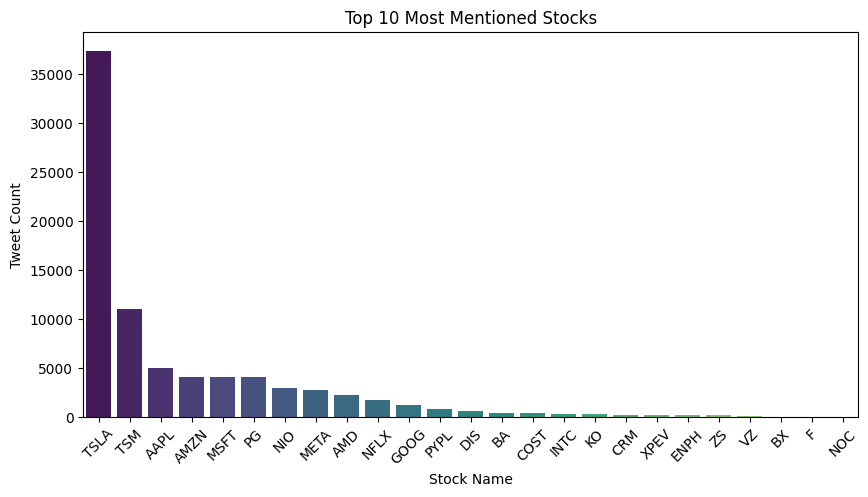

In [ ]:
import matplotlib.pyplot as plt
# Convert Date column to datetime format
tweet_data["Date"] = pd.to_datetime(tweet_data["Date"], errors="coerce")

# Top 10 most mentioned stocks
top_stocks = tweet_data["Ticker"].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_stocks.index, y=top_stocks.values, palette="viridis")
plt.xlabel("Stock Name")
plt.ylabel("Tweet Count")
plt.title("Top 10 Most Mentioned Stocks")
plt.xticks(rotation=45)
plt.show()

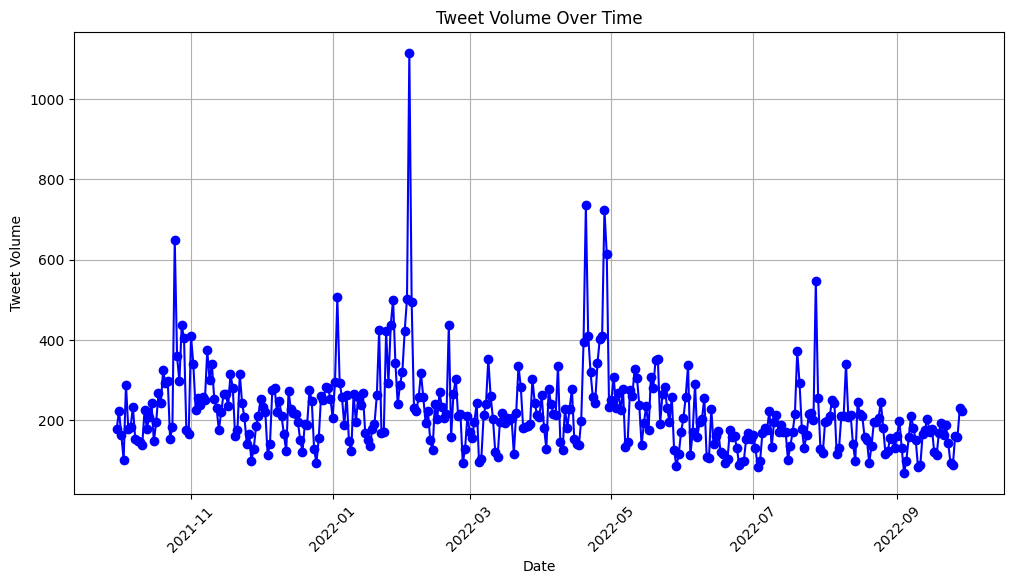

In [ ]:
# Resample tweets by day to analyze volume over time
tweet_volume = tweet_data.resample("D", on="Date").size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(tweet_volume.index, tweet_volume.values, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Tweet Volume")
plt.title("Tweet Volume Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

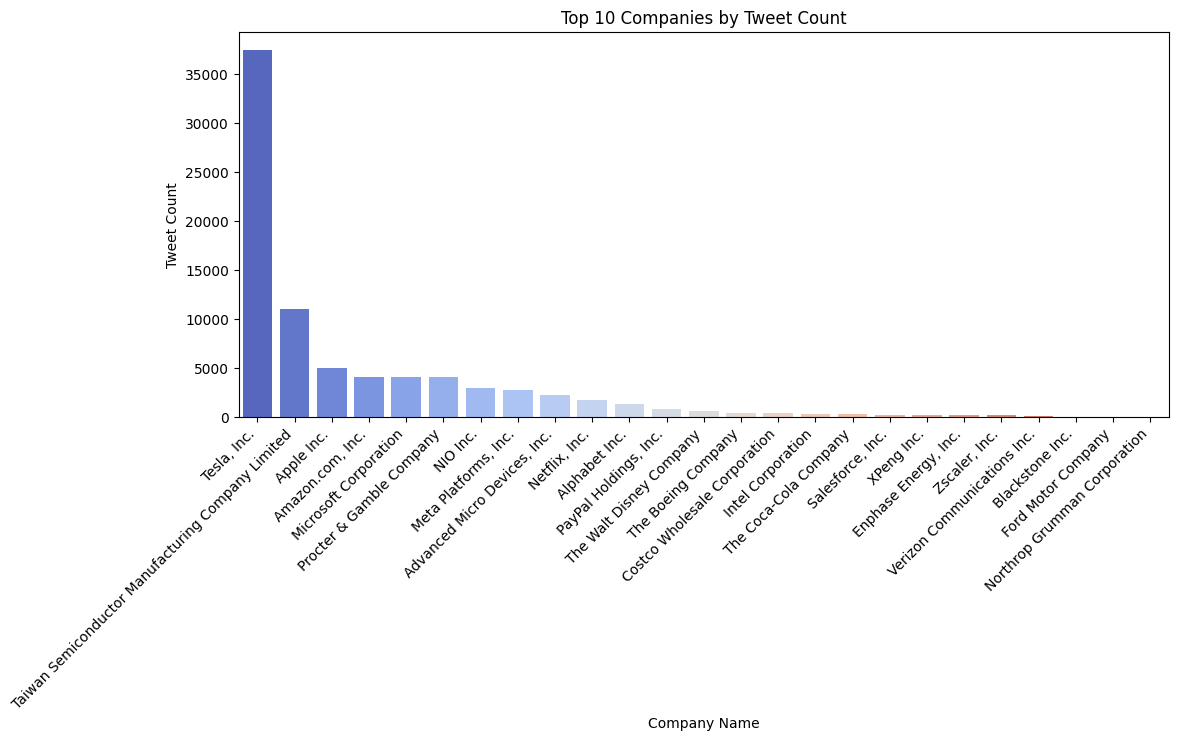

In [ ]:
# Top 10 companies by tweet count
top_companies = tweet_data["Company Name"].value_counts()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=top_companies.index, y=top_companies.values, palette="coolwarm")
plt.xlabel("Company Name")
plt.ylabel("Tweet Count")
plt.title("Top 10 Companies by Tweet Count")
plt.xticks(rotation=45, ha="right")
plt.show()

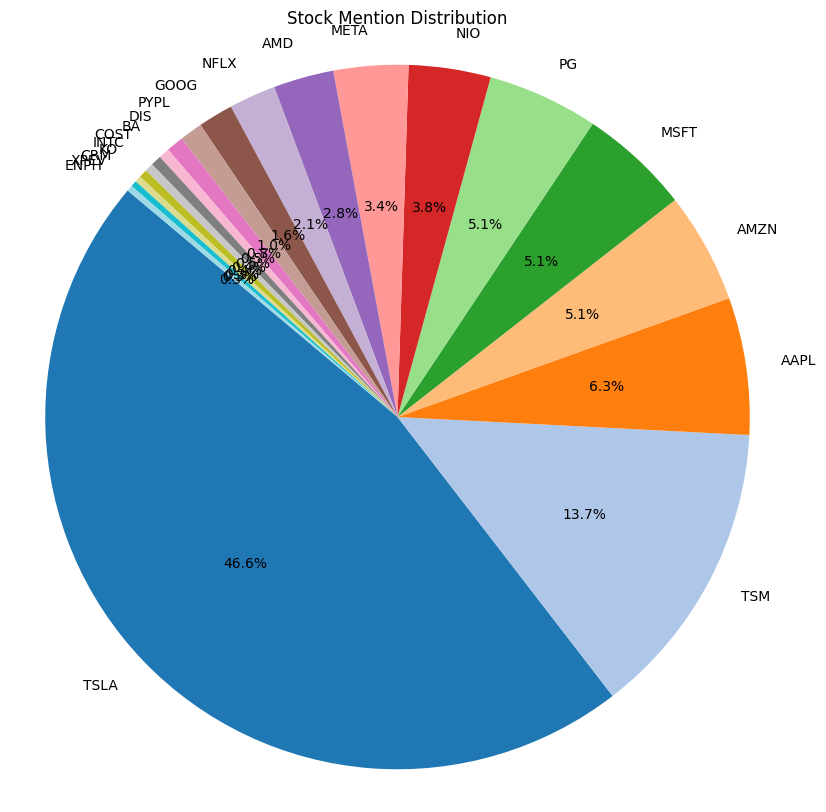

In [ ]:
# Aggregating stock mentions (taking only the top 20 for better visibility)
stock_counts = tweet_data["Ticker"].value_counts().nlargest(20)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(stock_counts, labels=stock_counts.index, autopct="%1.1f%%", startangle=140, 
        colors=plt.cm.tab20.colors)  # Use colormap colors manually
plt.title("Stock Mention Distribution")
plt.axis("equal")  # Ensures pie chart is a circle
plt.show()

In [ ]:
# Convert 'Date' columns to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date
tweet_data['Date'] = pd.to_datetime(tweet_data['Date']).dt.date

# Confirm the conversion
print(stock_data['Date'].head())
print(tweet_data['Date'].head())


0    2021-09-01
1    2021-09-02
2    2021-09-03
3    2021-09-07
4    2021-09-08
Name: Date, dtype: object
0    2022-09-29
1    2022-09-29
2    2022-09-29
3    2022-09-29
4    2022-09-29
Name: Date, dtype: object


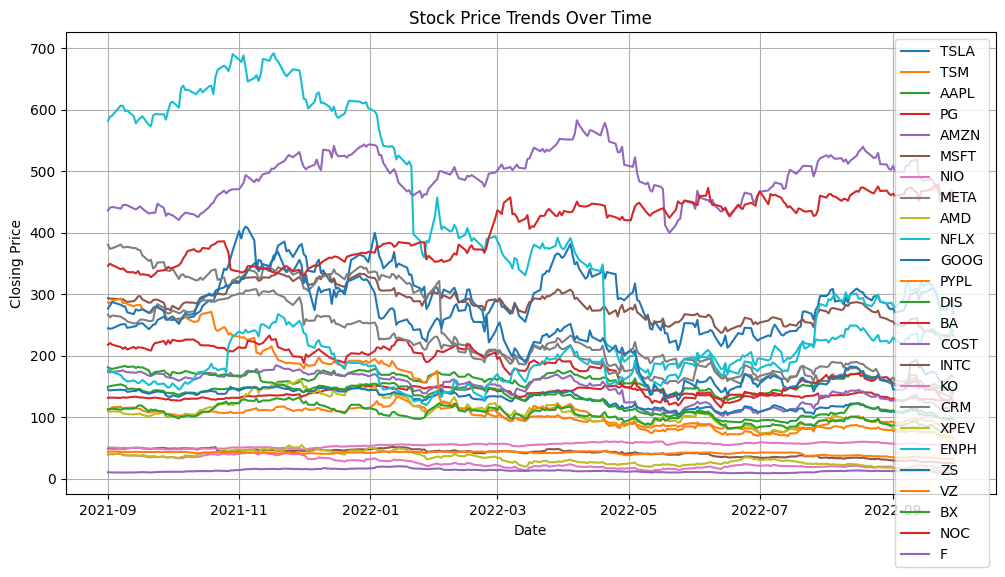

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data
stock_data = pd.read_csv("detailed_stock_data.csv", parse_dates=["Date"])

# Plot the stock closing prices over time
plt.figure(figsize=(12, 6))
for ticker in stock_data["Ticker"].unique():
    subset = stock_data[stock_data["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trends Over Time")
plt.legend()
plt.grid()
plt.show()


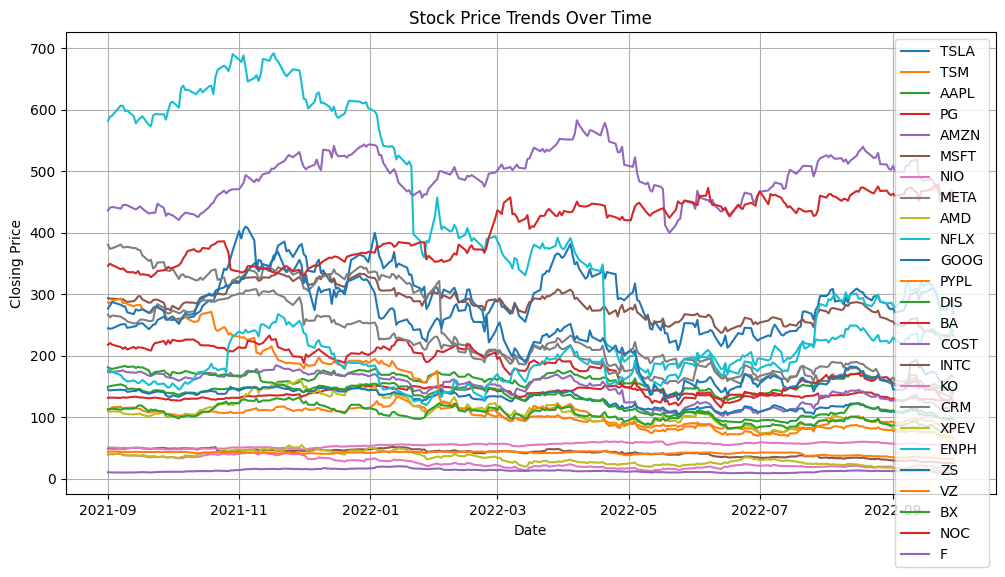

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data
stock_data = pd.read_csv("detailed_stock_data.csv", parse_dates=["Date"])

# Plot the stock closing prices over time
plt.figure(figsize=(12, 6))
for ticker in stock_data["Ticker"].unique():
    subset = stock_data[stock_data["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trends Over Time")
plt.legend()
plt.grid()
plt.show()


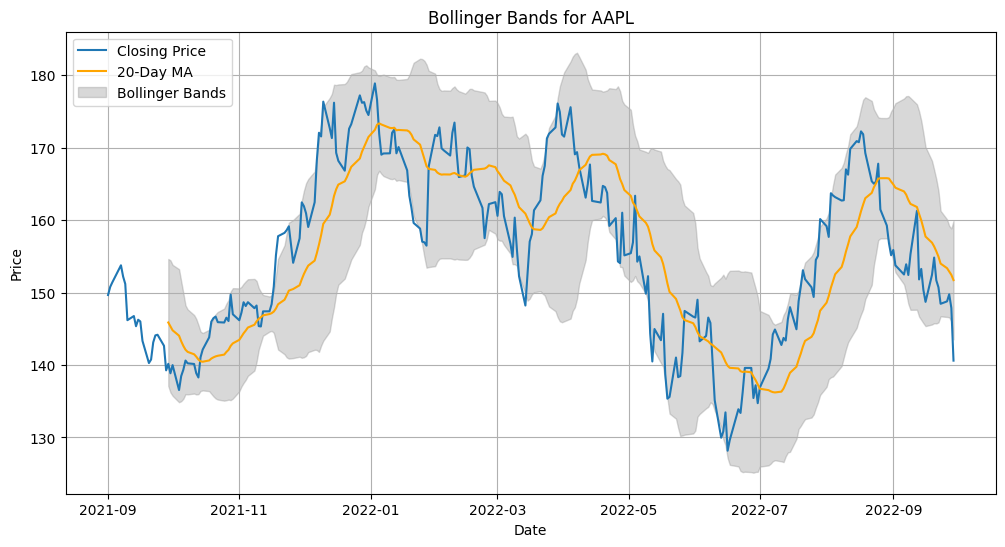

In [ ]:
import numpy as np

# Function to plot Bollinger Bands for a given stock
def plot_bollinger_bands(ticker):
    subset = stock_data[stock_data["Ticker"] == ticker]
    subset = subset.set_index("Date")

    # Calculate rolling mean and standard deviation
    window = 20  # 20-day moving average
    rolling_mean = subset["Close"].rolling(window=window).mean()
    rolling_std = subset["Close"].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)

    plt.figure(figsize=(12, 6))
    plt.plot(subset["Close"], label="Closing Price")
    plt.plot(rolling_mean, label="20-Day MA", color="orange")
    plt.fill_between(subset.index, lower_band, upper_band, color="gray", alpha=0.3, label="Bollinger Bands")

    plt.title(f"Bollinger Bands for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

# Plot Bollinger Bands for a specific stock
plot_bollinger_bands("AAPL")


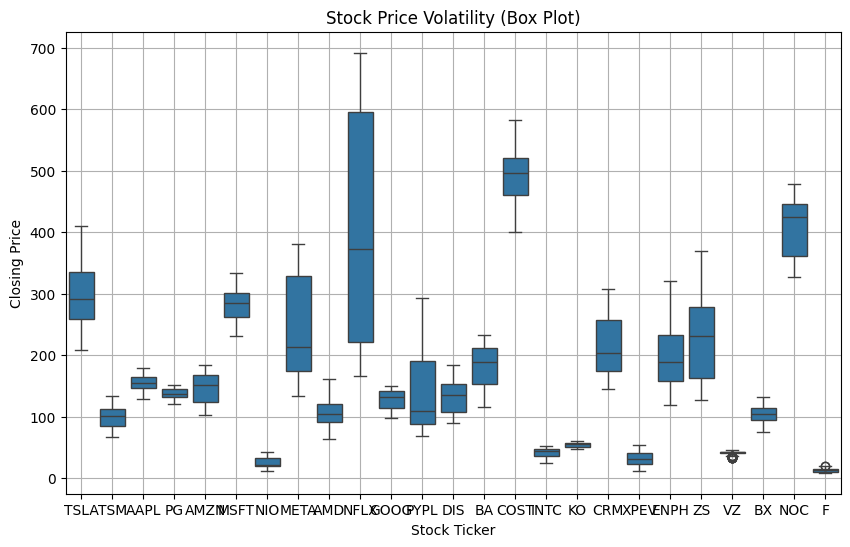

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="Ticker", y="Close", data=stock_data)
plt.title("Stock Price Volatility (Box Plot)")
plt.xlabel("Stock Ticker")
plt.ylabel("Closing Price")
plt.grid()
plt.show()


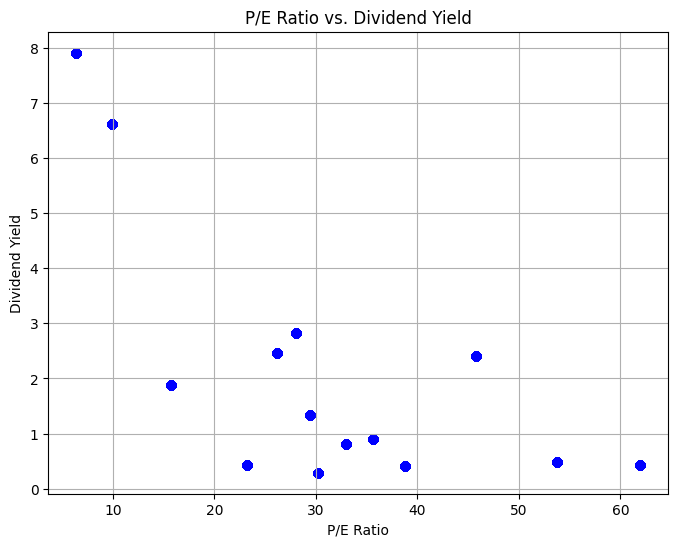

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(stock_data["P/E Ratio"], stock_data["Dividend Yield"], alpha=0.7, c="blue")

plt.xlabel("P/E Ratio")
plt.ylabel("Dividend Yield")
plt.title("P/E Ratio vs. Dividend Yield")
plt.grid()
plt.show()


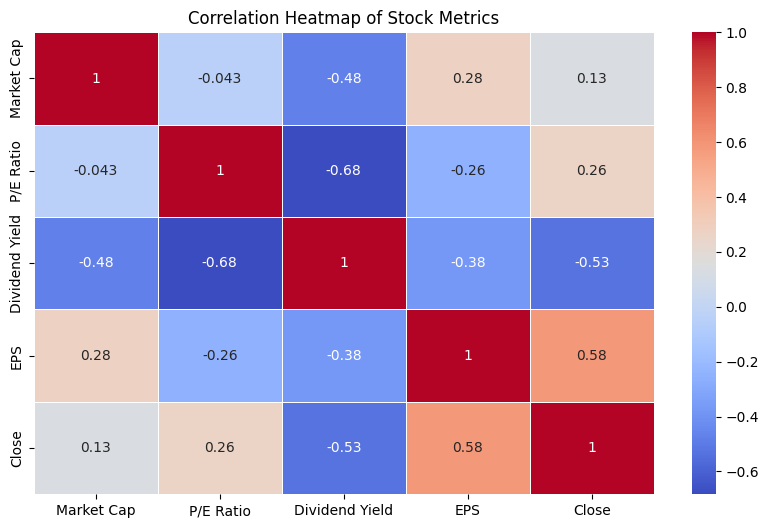

In [ ]:
import seaborn as sns

# Select numerical columns for correlation matrix
num_cols = ["Market Cap", "P/E Ratio", "Dividend Yield", "EPS", "Close"]
correlation_matrix = stock_data[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Metrics")
plt.show()


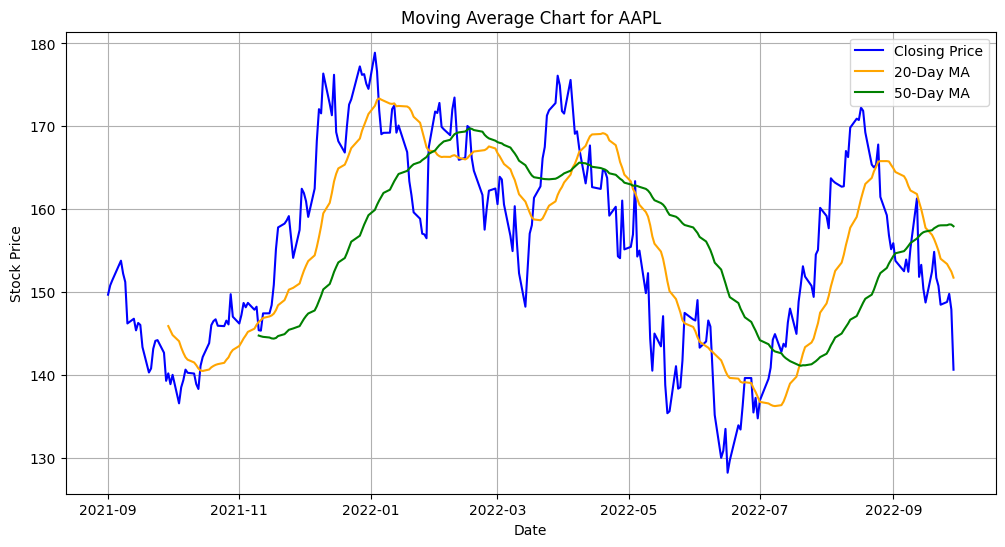

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data
stock_data = pd.read_csv("detailed_stock_data.csv", parse_dates=["Date"])

# Function to plot Moving Averages
def plot_moving_average(ticker, short_window=20, long_window=50):
    subset = stock_data[stock_data["Ticker"] == ticker]
    
    # Calculate Moving Averages
    subset["Short MA"] = subset["Close"].rolling(window=short_window).mean()
    subset["Long MA"] = subset["Close"].rolling(window=long_window).mean()

    # Plot Closing Prices and Moving Averages
    plt.figure(figsize=(12, 6))
    plt.plot(subset["Date"], subset["Close"], label="Closing Price", color="blue")
    plt.plot(subset["Date"], subset["Short MA"], label=f"{short_window}-Day MA", color="orange")
    plt.plot(subset["Date"], subset["Long MA"], label=f"{long_window}-Day MA", color="green")

    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(f"Moving Average Chart for {ticker}")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage for Apple (AAPL)
plot_moving_average("AAPL", short_window=20, long_window=50)


In [ ]:
# Define stock tickers
tickers = ["AAPL", "MSFT", "TSLA", "GOOG"]

# Define the period
start_date = "2021-09-01"
end_date = "2021-09-30"

# Fetch stock data for all tickers at once
all_data = {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

# Convert to DataFrame
stock_data = pd.concat(all_data, names=["Ticker", "Date"]).reset_index()

# Precompute Moving Averages (20-day & 50-day)
stock_data["Short MA"] = stock_data.groupby("Ticker")["Close"].transform(lambda x: x.rolling(20).mean())
stock_data["Long MA"] = stock_data.groupby("Ticker")["Close"].transform(lambda x: x.rolling(50).mean())

# Save data to CSV (optional)
stock_data.to_csv("precomputed_stock_data.csv", index=False)

print("Stock data successfully fetched and moving averages calculated!")
